In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/archive.zip > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array 
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [ ]:
len(os.listdir("/content/New Plant Diseases Dataset/New Plant Diseases Dataset/train"))  

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, horizontal_flip= True,rotation_range=True, preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)   

In [ ]:
train = train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size= (256,256),batch_size=32)

val = val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size= (256,256),batch_size=32) 

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Building the Model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras   

In [ ]:
base_model = VGG19(input_shape=(256,256,3))


80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
X = Flatten()(base_model.output)

#creating model
model = Model(base_model.input, X)  

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping (monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint (filepath="best_model.h5",monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1, save_best_only= True)
cb = [es, mc]

In [ ]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [ ]:
m = model.fit_generator(train,
                        steps_per_epoch= 16, 
                        epochs= 20, 
                        verbose=1,  
                        callbacks= cb, 
                        validation_data= val , 
                        validation_steps= 16 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 8.6468 - accuracy: 0.6992
Epoch 00001: val_accuracy did not improve from 0.77539
16/16 [==============================] - 17s 1s/step - loss: 8.6468 - accuracy: 0.6992 - val_loss: 6.6487 - val_accuracy: 0.7480
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 8.0316 - accuracy: 0.7227
Epoch 00002: val_accuracy did not improve from 0.77539
16/16 [==============================] - 16s 1s/step - loss: 8.0316 - accuracy: 0.7227 - val_loss: 6.8227 - val_accuracy: 0.7734
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 8.7781 - accuracy: 0.6953
Epoch 00003: val_accuracy did not improve from 0.77539
16/16 [==============================] - 17s 1s/step - loss: 8.7781 - accuracy: 0.6953 - val_loss: 6.9952 - val_accuracy: 0.7617
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 8.3200 - accuracy: 0.7129
Epoch 00004: val_accuracy improved from 0.77539 to 0.78711, saving m

In [ ]:
h=m.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

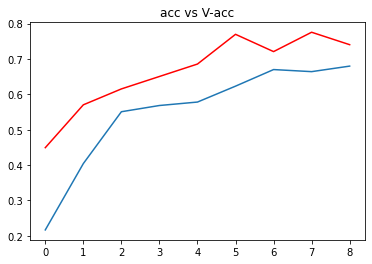

In [ ]:
plt.plot(h['accuracy']) 
plt.plot(h['val_accuracy'], c="red") 
plt.title("acc vs V-acc") 
plt.show()

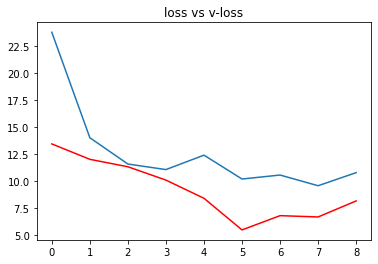

In [ ]:
plt.plot(h['loss']) 
plt.plot(h['val_loss'], c="red") 
plt.title("loss vs v-loss") 
plt.show()

In [ ]:
from keras.models import load_model

model =load_model("/content/best_model.h5")


In [ ]:
acc=model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is = 82.10790157318115 %
